In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
train_data = pd.read_csv('/gdrive/My Drive/mobile-price-classification/train.csv')
test_data = pd.read_csv('/gdrive/My Drive/mobile-price-classification/test.csv')

In [4]:
train_data.shape

(2000, 21)

In [5]:
test_data.shape

(1000, 21)

In [6]:
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [10]:
test_data=test_data.drop(columns=['id'])

In [11]:
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

### normalizing numeric data

In [14]:
for cols in train_data.loc[:, train_data.columns != 'price_range']:
    train_data[cols] = ((train_data[cols] -  train_data[cols].mean())/(train_data[cols].std()))

In [15]:
for cols in test_data.columns:
    test_data[cols] = ((test_data[cols] -  test_data[cols].mean())/(test_data[cols].std()))

# Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def classification_reports(X_train, y_train, model, target_names):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  print(classification_report(y_train, y_pred, target_names=target_names))

## part 1:

### MultiClasses:

In [26]:
y_train = train_data['price_range']
X_train = train_data.drop(columns = ['price_range'])
target_names_4classes = ['class 0', 'class 1', 'class 2', 'class 3']
model_multiple_classes = LogisticRegression(multi_class='multinomial',  solver='lbfgs')
classification_reports(X_train, y_train, model_multiple_classes, target_names_4classes)

              precision    recall  f1-score   support

     class 0       0.98      0.99      0.99       500
     class 1       0.98      0.97      0.97       500
     class 2       0.97      0.96      0.97       500
     class 3       0.98      0.99      0.99       500

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



## part 2:

###  Balance Dataset

In [19]:
import seaborn as sns

In [20]:
train_data['price_range'].value_counts()/train_data['price_range'].count()

3    0.25
2    0.25
1    0.25
0    0.25
Name: price_range, dtype: float64

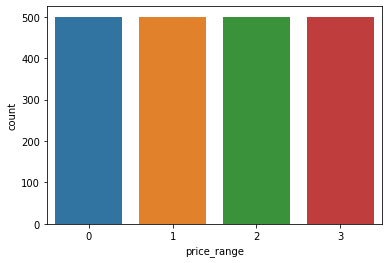

In [21]:
sns.countplot(x='price_range', data=train_data)

## part 3:

### reduce number of classes

In [22]:
train_data_new = train_data.copy()
label1 = [1, 2, 3]
def reduce_num_of_classes(x):
    if x in label1:
        return 1
    else:
        return x

train_data_new['price_range'] = train_data_new['price_range'].apply(reduce_num_of_classes)

## part 4:

two classes:
### highly unbalanced :

In [23]:
train_data_new['price_range'].value_counts()/train_data_new['price_range'].count()

1    0.75
0    0.25
Name: price_range, dtype: float64

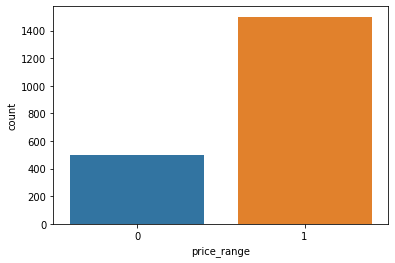

In [24]:
sns.countplot(x='price_range', data=train_data_new)

### Logistic Regression Model(Binary Unbalanced classes):




In [25]:
y_train_new = train_data_new['price_range']
X_train_new = train_data_new.drop(columns= ['price_range'])
model_binary_classes = LogisticRegression(solver='liblinear', random_state=0)
target_names_2classes = ['class 0', 'class 1']
classification_reports(X_train_new, y_train_new, model_binary_classes, target_names_2classes)

              precision    recall  f1-score   support

     class 0       0.98      1.00      0.99       500
     class 1       1.00      0.99      1.00      1500

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



## part 5:

### Random undersampling:

In [27]:
import random
class0_list = []
for j, i in enumerate(train_data_new['price_range']):
  if(i==0):
    class0_list.append(j)
class1_list=[i for i in range(2000)]
for i in class0_list:
  class1_list.remove(i)
selected_index = random.sample(class1_list, len(class0_list))
class1 = train_data_new.iloc[selected_index]
class0 = train_data_new.iloc[class0_list]
all = [class1, class0]
train_data_new = pd.concat(all)
train_data_new = train_data_new.sample(n=1000)
train_data_new = train_data_new.reset_index()

In [28]:
train_data_new['price_range'].value_counts()/train_data_new['price_range'].count()

1    0.5
0    0.5
Name: price_range, dtype: float64

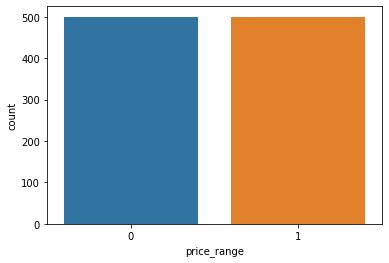

In [29]:
sns.countplot(x='price_range', data=train_data_new)

In [30]:
y_train_new = train_data_new['price_range']
X_train_new = train_data_new.drop(columns= ['price_range'])
classification_reports(X_train_new, y_train_new, model_binary_classes, target_names_2classes)

              precision    recall  f1-score   support

     class 0       0.97      1.00      0.98       500
     class 1       1.00      0.97      0.98       500

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



## part 6:

### Forward Selection:

In [31]:
train_data3 = train_data.copy()
label0 = [0, 1]
def reduce_num_of_classes(x):
    if x in label0:
        return 0
    else:
        return 1

train_data3['price_range'] = train_data3['price_range'].apply(reduce_num_of_classes)

In [32]:
train_data3['price_range'].value_counts()/train_data3['price_range'].count()

1    0.5
0    0.5
Name: price_range, dtype: float64

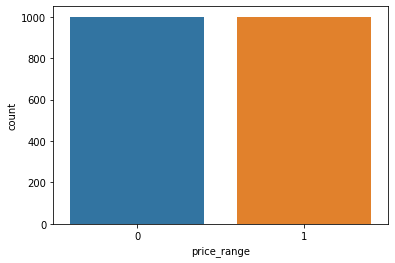

In [33]:
sns.countplot(x='price_range', data=train_data3)

In [34]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold

In [39]:
def forwardSelection(X, y):
    # Create list to store accuracies and chosen features
    roc_auc_by_feature_number = []
    chosen_features = []

    # Initialise chosen features list and run tracker
    available_features = list(X)
    run = 0
    number_of_features = len(list(X))

    # Loop through feature list to select next feature
    while len(available_features)> 0:

        # Track and pront progress
        run += 1
        #print ('Feature run {} of {}'.format(run, number_of_features))
        
        # Convert DataFrames to NumPy arrays
        y_np = y.values
        
        # Reset best feature and accuracy
        best_result = 0
        best_feature = ''

        # Loop through available features
        for feature in available_features:

            # Create copy of already chosen features to avoid orginal being changed
            features_to_use = chosen_features.copy()
            # Create a list of features from features already chosen + 1 new feature
            features_to_use.append(feature)
            # Get data for features, and convert to NumPy array
            X_np = X[features_to_use].values
            
            # Set up lists to hold results for each selected features
            test_auc_results = []
        
            # Set up k-fold training/test splits
            number_of_splits = 5
            skf = StratifiedKFold(n_splits = number_of_splits)
            skf.get_n_splits(X_np, y)
        
            # Loop through the k-fold splits
            for train_index, test_index in skf.split(X_np, y_np):
                
                # Get X and Y train/test
                X_train, X_test = X_np[train_index], X_np[test_index]
                y_train, y_test = y[train_index], y[test_index]
        
                # Get X and Y train/test
                #X_train_std, X_test_std = standardise_data(X_train, X_test)
        
                # Set up and fit model
                model = LogisticRegression(solver='lbfgs')
                model.fit(X_train, y_train)
        
                # Predict test set labels
                y_pred_test = model.predict(X_test)
                
                # Calculate accuracy of test sets
                accuracy_test = np.mean(y_pred_test == y_test)
              
                # Get ROC AUC
                probabilities = model.predict_proba(X_test)
                probabilities = probabilities[:, 1] # Probability of 'survived'
                fpr, tpr, thresholds = roc_curve(y_test, probabilities)
                roc_auc = auc(fpr, tpr)
                test_auc_results.append(roc_auc)
            
            # Get average result from all k-fold splits
            feature_auc = np.mean(test_auc_results)
        
            # Update chosen feature and result if this feature is a new best
            if feature_auc > best_result:
                best_result = feature_auc
                best_feature = feature
        
        # k-fold splits are complete    
        # Add mean accuracy and AUC to record of accuracy by feature number
        roc_auc_by_feature_number.append(best_result)
        chosen_features.append(best_feature)
        available_features.remove(best_feature)

    # Put results in DataFrame
    results = pd.DataFrame()
    results['feature to add'] = chosen_features
    results['ROC AUC'] = roc_auc_by_feature_number
    return results

In [36]:
y = train_data3['price_range']
X = train_data3.drop(columns = ['price_range'])

In [40]:
forwardSelection(X, y)

,feature to add,ROC AUC
0,ram,0.975568
1,battery_power,0.987835
2,px_height,0.996785
3,px_width,0.999430
4,mobile_wt,0.999650
5,wifi,0.999720
6,int_memory,0.999725
7,blue,0.999735
8,four_g,0.999740
9,sc_h,0.999720


## part7:

We only use the first 5 features:

In [41]:
X_train4 = train_data3[['ram', 'battery_power', 'px_height','px_width', 'mobile_wt']]
y_train4 = train_data3['price_range']
classification_reports(X_train4, y_train4, model_binary_classes, target_names_2classes)

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99      1000
     class 1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



## part 8:

### PCA(Principal component analysis)

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_train4)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [44]:
 print(pca.explained_variance_ratio_)

[0.30219317 0.20079918 0.19987953 0.19948384 0.09764428]


In [45]:
print(pca.singular_values_)

[54.95835453 44.79941715 44.69671006 44.65244666 31.24027221]


## part 9:

In [46]:
classification_reports(principalDf, y_train4, model_binary_classes, target_names_2classes)

              precision    recall  f1-score   support

     class 0       0.99      0.99      0.99      1000
     class 1       0.99      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



## part 10:

In [54]:
def backwardElimination(X, y):
    # Create list to store accuracies and chosen features
    roc_auc_by_feature_number = []
    chosen_features = []

    # Initialise chosen features list and run tracker
    available_features = list(X)
    run = 0
    number_of_features = len(list(X))

    # Creat einitial reference performance
    reference_auc = 1.0 # used to compare reduction in AUC

    # Loop through feature list to select next feature
    while len(available_features)> 1:

        # Track and pront progress
        run += 1
        #print ('Feature run {} of {}'.format(run, number_of_features-1))
        
        # Convert DataFrames to NumPy arrays
        y_np = y.values
        
        # Reset best feature and accuracy
        best_result = 1.0
        best_feature = ''

        # Loop through available features
        for feature in available_features:

            # Create copy of already chosen features to avoid orginal being changed
            features_to_use = available_features.copy()
            # Create a list of features to use by removing 1 feature
            features_to_use.remove(feature)
            # Get data for features, and convert to NumPy array
            X_np = X[features_to_use].values
            
            # Set up lists to hold results for each selected features
            test_auc_results = []
        
            # Set up k-fold training/test splits
            number_of_splits = 5
            skf = StratifiedKFold(n_splits = number_of_splits)
            skf.get_n_splits(X_np, y)
        
            # Loop through the k-fold splits
            for train_index, test_index in skf.split(X_np, y_np):
                
                # Get X and Y train/test
                X_train, X_test = X_np[train_index], X_np[test_index]
                y_train, y_test = y[train_index], y[test_index]
      
        
                # Set up and fit model
                model = LogisticRegression(solver='lbfgs')
                model.fit(X_train, y_train)
        
                # Predict test set labels
                y_pred_test = model.predict(X_test)
                
                # Calculate accuracy of test sets
                accuracy_test = np.mean(y_pred_test == y_test)
              
                # Get ROC AUC
                probabilities = model.predict_proba(X_test)
                probabilities = probabilities[:, 1] # Probability of 'survived'
                fpr, tpr, thresholds = roc_curve(y_test, probabilities)
                roc_auc = auc(fpr, tpr)
                test_auc_results.append(roc_auc)
            
            # Get average result from all k-fold splits
            feature_auc = np.mean(test_auc_results)
        
            # Update chosen feature and result if this feature is a new best
            # We are looking for the smallest drop in performance
            drop_in_performance = reference_auc - feature_auc
            if drop_in_performance < best_result:
                best_result = drop_in_performance
                best_feature = feature
                best_auc = feature_auc
                    
        # k-fold splits are complete    
        # Add mean accuracy and AUC to record of accuracy by feature number
        roc_auc_by_feature_number.append(best_auc)
        chosen_features.append(best_feature)    
        available_features.remove(best_feature)
        reference_auc = best_auc

    # Add last remaining feature
    chosen_features += available_features
    roc_auc_by_feature_number.append(0)
        
    # Put results in DataFrame
    # Reverse order of lists with [::-1] so best features first
    results = pd.DataFrame()
    results['feature removed'] = chosen_features[::-1]
    results['ROC AUC'] = roc_auc_by_feature_number[::-1]
    return results

In [55]:
backwardElimination(X, y)

,feature removed,ROC AUC
0,ram,0.000000
1,battery_power,0.975568
2,px_height,0.987835
3,px_width,0.996785
4,mobile_wt,0.999430
5,wifi,0.999650
6,pc,0.999720
7,int_memory,0.999725
8,n_cores,0.999725
9,dual_sim,0.999745


we remove all features except "ram" and "battery_power"

In [57]:
X_train5 = train_data3[['ram', 'battery_power']]
y_train5 = train_data3['price_range']
classification_reports(X_train5, y_train5, model_binary_classes, target_names_2classes)

              precision    recall  f1-score   support

     class 0       0.93      0.93      0.93      1000
     class 1       0.93      0.94      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



## part 11:

### k-Fold Cross Validation

In [58]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [59]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.961 (0.006)


In [60]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.963 (0.011)
